# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [4]:
# generate the scatter plot to make sure that the cities are evenly distributed throughout the globe
#plt.scatter(lat_lngs[lats],lat_lngs[lngs],marker="o",facecolors="red",edgecolors="black",s=50,alpha=0.75)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# API set up
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

# Counter to delay the process
record = 1

# Lists to hold data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Loop through the list of cities
for city in enumerate(cities):
    if record == 50:
        record +=1
        time.sleep(60)
    
    query_url = f"{url}{api_key}&q={city}"
    #print(query_url)
    response = requests.get(query_url).json()
    
    # Print the record for review 
    print(f"{city} was found in the Open Weathermap API\n")
            
        # Append the pertinent data to lists above using the variables created above
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    
    # If the data is not in Open WeatherMap API and it creates a Null
    except:
        print(f"{city} was not found in the Open Weathermap API\n")
        record +=1
        pass
    
print("Completed") 

(0, 'jamestown') was found in the Open Weathermap API

(0, 'jamestown') was not found in the Open Weathermap API

(1, 'hobart') was found in the Open Weathermap API

(1, 'hobart') was not found in the Open Weathermap API

(2, 'rikitea') was found in the Open Weathermap API

(2, 'rikitea') was not found in the Open Weathermap API

(3, 'kodiak') was found in the Open Weathermap API

(3, 'kodiak') was not found in the Open Weathermap API

(4, 'hithadhoo') was found in the Open Weathermap API

(4, 'hithadhoo') was not found in the Open Weathermap API

(5, 'yellowknife') was found in the Open Weathermap API

(5, 'yellowknife') was not found in the Open Weathermap API

(6, 'bredasdorp') was found in the Open Weathermap API

(6, 'bredasdorp') was not found in the Open Weathermap API

(7, 'mabaruma') was found in the Open Weathermap API

(7, 'mabaruma') was not found in the Open Weathermap API

(8, 'tyumentsevo') was found in the Open Weathermap API

(8, 'tyumentsevo') was not found in the Ope

(73, 'andenes') was found in the Open Weathermap API

(73, 'andenes') was not found in the Open Weathermap API

(74, 'saint-georges') was found in the Open Weathermap API

(74, 'saint-georges') was not found in the Open Weathermap API

(75, 'kendari') was found in the Open Weathermap API

(75, 'kendari') was not found in the Open Weathermap API

(76, 'moss point') was found in the Open Weathermap API

(76, 'moss point') was not found in the Open Weathermap API

(77, 'sorland') was found in the Open Weathermap API

(77, 'sorland') was not found in the Open Weathermap API

(78, 'karratha') was found in the Open Weathermap API

(78, 'karratha') was not found in the Open Weathermap API

(79, 'hobyo') was found in the Open Weathermap API

(79, 'hobyo') was not found in the Open Weathermap API

(80, 'geraldton') was found in the Open Weathermap API

(80, 'geraldton') was not found in the Open Weathermap API

(81, 'katobu') was found in the Open Weathermap API

(81, 'katobu') was not found in

(145, 'jiroft') was found in the Open Weathermap API

(145, 'jiroft') was not found in the Open Weathermap API

(146, 'georgetown') was found in the Open Weathermap API

(146, 'georgetown') was not found in the Open Weathermap API

(147, 'mys shmidta') was found in the Open Weathermap API

(147, 'mys shmidta') was not found in the Open Weathermap API

(148, 'busselton') was found in the Open Weathermap API

(148, 'busselton') was not found in the Open Weathermap API

(149, 'santa marta') was found in the Open Weathermap API

(149, 'santa marta') was not found in the Open Weathermap API

(150, 'wahiawa') was found in the Open Weathermap API

(150, 'wahiawa') was not found in the Open Weathermap API

(151, 'pisco') was found in the Open Weathermap API

(151, 'pisco') was not found in the Open Weathermap API

(152, 'dikson') was found in the Open Weathermap API

(152, 'dikson') was not found in the Open Weathermap API

(153, 'bathsheba') was found in the Open Weathermap API

(153, 'bathsh

(217, 'saraland') was found in the Open Weathermap API

(217, 'saraland') was not found in the Open Weathermap API

(218, 'cabedelo') was found in the Open Weathermap API

(218, 'cabedelo') was not found in the Open Weathermap API

(219, 'biu') was found in the Open Weathermap API

(219, 'biu') was not found in the Open Weathermap API

(220, 'nanortalik') was found in the Open Weathermap API

(220, 'nanortalik') was not found in the Open Weathermap API

(221, 'impfondo') was found in the Open Weathermap API

(221, 'impfondo') was not found in the Open Weathermap API

(222, 'bengkulu') was found in the Open Weathermap API

(222, 'bengkulu') was not found in the Open Weathermap API

(223, 'vaitupu') was found in the Open Weathermap API

(223, 'vaitupu') was not found in the Open Weathermap API

(224, 'xapuri') was found in the Open Weathermap API

(224, 'xapuri') was not found in the Open Weathermap API

(225, 'manama') was found in the Open Weathermap API

(225, 'manama') was not found 

(287, 'kindu') was found in the Open Weathermap API

(287, 'kindu') was not found in the Open Weathermap API

(288, 'lodja') was found in the Open Weathermap API

(288, 'lodja') was not found in the Open Weathermap API

(289, 'naze') was found in the Open Weathermap API

(289, 'naze') was not found in the Open Weathermap API

(290, 'aurora') was found in the Open Weathermap API

(290, 'aurora') was not found in the Open Weathermap API

(291, 'gua musang') was found in the Open Weathermap API

(291, 'gua musang') was not found in the Open Weathermap API

(292, 'norman wells') was found in the Open Weathermap API

(292, 'norman wells') was not found in the Open Weathermap API

(293, 'nemuro') was found in the Open Weathermap API

(293, 'nemuro') was not found in the Open Weathermap API

(294, 'taltal') was found in the Open Weathermap API

(294, 'taltal') was not found in the Open Weathermap API

(295, 'padang') was found in the Open Weathermap API

(295, 'padang') was not found in the O

(359, 'ahipara') was found in the Open Weathermap API

(359, 'ahipara') was not found in the Open Weathermap API

(360, 'airai') was found in the Open Weathermap API

(360, 'airai') was not found in the Open Weathermap API

(361, 'kavieng') was found in the Open Weathermap API

(361, 'kavieng') was not found in the Open Weathermap API

(362, 'buraydah') was found in the Open Weathermap API

(362, 'buraydah') was not found in the Open Weathermap API

(363, 'mocuba') was found in the Open Weathermap API

(363, 'mocuba') was not found in the Open Weathermap API

(364, 'sokoni') was found in the Open Weathermap API

(364, 'sokoni') was not found in the Open Weathermap API

(365, 'mtwara') was found in the Open Weathermap API

(365, 'mtwara') was not found in the Open Weathermap API

(366, 'certesti') was found in the Open Weathermap API

(366, 'certesti') was not found in the Open Weathermap API

(367, 'porbandar') was found in the Open Weathermap API

(367, 'porbandar') was not found in t

(430, 'zhangjiakou') was found in the Open Weathermap API

(430, 'zhangjiakou') was not found in the Open Weathermap API

(431, 'scarborough') was found in the Open Weathermap API

(431, 'scarborough') was not found in the Open Weathermap API

(432, 'samusu') was found in the Open Weathermap API

(432, 'samusu') was not found in the Open Weathermap API

(433, 'timra') was found in the Open Weathermap API

(433, 'timra') was not found in the Open Weathermap API

(434, 'karasjok') was found in the Open Weathermap API

(434, 'karasjok') was not found in the Open Weathermap API

(435, 'pacific grove') was found in the Open Weathermap API

(435, 'pacific grove') was not found in the Open Weathermap API

(436, 'voh') was found in the Open Weathermap API

(436, 'voh') was not found in the Open Weathermap API

(437, 'komsomolskiy') was found in the Open Weathermap API

(437, 'komsomolskiy') was not found in the Open Weathermap API

(438, 'yulara') was found in the Open Weathermap API

(438, 'y

(501, 'mayumba') was found in the Open Weathermap API

(501, 'mayumba') was not found in the Open Weathermap API

(502, 'codrington') was found in the Open Weathermap API

(502, 'codrington') was not found in the Open Weathermap API

(503, 'adeje') was found in the Open Weathermap API

(503, 'adeje') was not found in the Open Weathermap API

(504, 'kharp') was found in the Open Weathermap API

(504, 'kharp') was not found in the Open Weathermap API

(505, 'hereford') was found in the Open Weathermap API

(505, 'hereford') was not found in the Open Weathermap API

(506, 'conceicao do araguaia') was found in the Open Weathermap API

(506, 'conceicao do araguaia') was not found in the Open Weathermap API

(507, 'weiser') was found in the Open Weathermap API

(507, 'weiser') was not found in the Open Weathermap API

(508, 'portmore') was found in the Open Weathermap API

(508, 'portmore') was not found in the Open Weathermap API

(509, 'sechura') was found in the Open Weathermap API

(509,

(573, 'chabahar') was found in the Open Weathermap API

(573, 'chabahar') was not found in the Open Weathermap API

(574, 'jishou') was found in the Open Weathermap API

(574, 'jishou') was not found in the Open Weathermap API

(575, 'lianran') was found in the Open Weathermap API

(575, 'lianran') was not found in the Open Weathermap API

(576, 'benguela') was found in the Open Weathermap API

(576, 'benguela') was not found in the Open Weathermap API

(577, 'ixtapa') was found in the Open Weathermap API

(577, 'ixtapa') was not found in the Open Weathermap API

(578, 'lamu') was found in the Open Weathermap API

(578, 'lamu') was not found in the Open Weathermap API

(579, 'udachnyy') was found in the Open Weathermap API

(579, 'udachnyy') was not found in the Open Weathermap API

(580, 'basco') was found in the Open Weathermap API

(580, 'basco') was not found in the Open Weathermap API

(581, 'puerto cabezas') was found in the Open Weathermap API

(581, 'puerto cabezas') was not fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

In [7]:
# Convert the dictionary into a dataframe and display
cities_df = pd.DataFrame(weather_data)
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [38]:
# Save the dataframe
cities_df.to_csv("open_weathermap_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [8]:
# Read in the Open Weathermap data
cities_df = pd.read_csv('open_weathermap_data.csv')

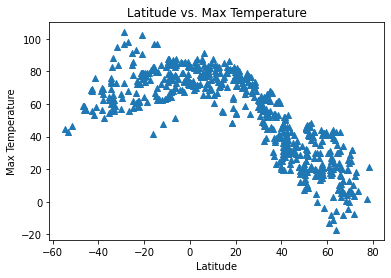

Conclusion


In [9]:
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker = "^")
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plt.savefig("Lat_v_max_temp.png")
plt.show()

print("Conclusion - We are approaching winter in the North Hemisphere!")

## Latitude vs. Humidity Plot

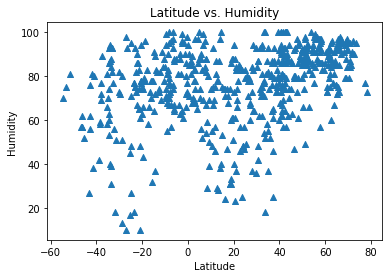

Conclusion - Very few places have low humidity likely because civilization clusters near the coasts


In [13]:
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker = "^")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("Lat_v_Humidity.png")
plt.show()

print("Conclusion - Very few places have low humidity likely because civilization clusters near the coasts")

## Latitude vs. Cloudiness Plot

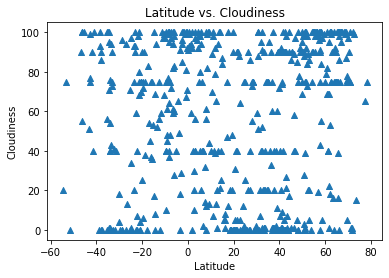

Conclusion - Latitudes from ~15 to 40 degrees seem to have a high concentration of clear days


In [12]:
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker = "^")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("Lat_v_Cloudiness.png")
plt.show()

print("Conclusion - Latitudes from ~15 to 40 degrees seem to have a high concentration of clear days")

## Latitude vs. Wind Speed Plot

In [ ]:
plt.scatter(cities_df["lat"], cities_df["w_speed"], marker = "^")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("Pics/Lat_v_w_speed.png")
plt.show()

print("Conclusion")

## Linear Regression

In [ ]:
#Divide the cities into Northern and Southern Hemisphere DataFrames
northern_df = cities_df.loc[cities_df["lat"].astype(float) > 0]
southern_df = cities_df.loc[cities_df["lat"].astype(float) < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Run Linear Regression Analysis
x_values = northern_df["lat"]
y_values = northern_df["temp_max"]

# Plot scatter plot
plt.scatter(x_values,y_values)

# Regression line info
(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

# Plot the regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 6, color = "green")

# Title & Axis labels
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Display the analysis results
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/North_Hem_Lat_v_Max_temp.png")
plt.show()

print("conclusion")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
#Run Linear Regression Analysis
x_values = southern_df["lat"]
y_values = southern_df["temp_max"]

#Plot scatter plot
plt.scatter(x_values,y_values)

# Regression line info
(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 6, color = "green")

#Title & Axis labels
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Display the analysis results
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/North_Hem_Lat_v_temp_max.png")
plt.show()

print("conclusion")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
#Run Linear Regression Analysis
x_values = northern_df["lat"]
y_values = northern_df["humidity"]

#Plot scatter plot
plt.scatter(x_values,y_values)

# Regression line info
(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 6, color = "green")

#Title & Axis labels
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Display the analysis results
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/North_Hem_Hum_vs_Lat.png")
plt.show()

print("conclusion")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
#Run Linear Regression Analysis
x_values = southern_df["lat"]
y_values = southern_df["humidity"]

#Plot scatter plot
plt.scatter(x_values,y_values)

# Regression line info
(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 6, color = "green")

#Title & Axis labels
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Display the analysis results
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/South_Hem_Hum_vs_Lat.png")
plt.show()

print("conclusion")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
#Run Linear Regression Analysis
x_values = northern_df["lat"]
y_values = northern_df["clouds"]

#Plot scatter plot
plt.scatter(x_values,y_values)

# Regression line info
(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 6, color = "green")

#Title & Axis labels
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Display the analysis results
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/North_Hem_Cloudi_vs_Lat.png")
plt.show()

print("Conclusion")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:

#Run Linear Regression Data
x_values = southern_df["lat"]
y_values = southern_df["clouds"]

#Plot scatter plot
plt.scatter(x_values,y_values)

# Regression line info
(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 6, color = "green")

#Title & Axis labels
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Display the analysis results
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/South_Hem_Cloudi_vs_Lat.png")
plt.show()

print("Conclusion")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#Run Linear Regression Data
x_values = northern_df["lat"]
y_values = northern_df["wind"]

#Plot scatter plot
plt.scatter(x_values,y_values)

# Regression line info
(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 6, color = "green")

#Title & Axis labels
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/North_Hem_W_Speed_vs_Lat.png")
plt.show()

print("Conclusion.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#Run Linear Regression Data
x_values = southern_df["lat"]
y_values = southern_df["wind"]

#Plot scatter plot
plt.scatter(x_values,y_values)


(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))



#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 6, color = "green")

#Title & Axis labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/South_Hem_W_Speed_vs_Lat.png")
plt.show()

print("Conclusion")